In [3]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [64]:
# write your code for task 0 here
df = pd.read_csv("../data/adult.csv")
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

filtered_salary = np.where((df["salary K$"] <= 50) & (df["salary"] == "<=50K"), df["salary K$"],
                                 np.where((df["salary K$"] > 50) & (df["salary"] == ">50K"), df["salary K$"], np.nan))

len(filtered_salary)

30162

# Task 1
Print the count of men and women in the dataset.

In [65]:
# write your code for task 1 here
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [43]:
# write your code for task 2 here
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [44]:
# write your code for task 3 here
df[df["native-country"] == "Poland"].shape[0] / df.shape[0] * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [45]:
# write your code for task 4 here
per = df[df["salary"] == ">50K"]
per["age"].mean()
per["age"].std()

per = df[df["salary"] == "<=50K"]
per["age"].mean()
per["age"].std()

13.464631257161633

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [46]:
# write your code for task 5 here
levels = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

df[(~df["education"].isin(levels)) & (df["salary"] == ">50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [47]:
# write your code for task 6 here
df.groupby(df["education"]).describe()

Unnamed: 0                                                      \
                  count          mean          std    min      25%      50%   
education                                                                     
10th              820.0  16099.841463  9323.630350  219.0  7860.75  16110.5   
11th             1048.0  16230.614504  9435.727749    3.0  7773.25  16491.5   
12th              377.0  17524.734748  9160.712573  415.0  9895.00  18630.0   
1st-4th           151.0  17502.503311  9788.829534  416.0  9009.00  17445.0   
5th-6th           288.0  16845.131944  9273.562959   56.0  9557.75  17173.0   
7th-8th           557.0  16283.675045  9328.136399   15.0  8014.00  16464.0   
9th               455.0  16306.367033  9438.104861    6.0  7638.50  16734.0   
Assoc-acdm       1008.0  16667.503968  9503.534369   13.0  8176.00  16897.5   
Assoc-voc        1307.0  16520.351186  9429.290747   48.0  8453.50  16722.0   
Bachelors        5044.0  16187.880452  9355.163922    0.0  8265.75  16108.0   
Doctorate         375.0  16600.130667  9141.070844   20.0  9067.50  16573.0   
HS-grad          9840.0  16166.445935  9338.758443    2.0  8173.75  16058.5   
Masters          1627.0  16341.271051  9497.768306    5.0  8094.00  16134.0   
Preschool          45.0  18268.377778  9824.639913  224.0  8775.00  21388.0   
Prof-school       542.0  16724.850554  9575.872379   52.0  8325.50  17072.0   
Some-college     6678.0  16266.526804  9414.721651   10.0  7986.25  16238.5   

                                    age             ... hours-per-week        \
                   75%      max   count       mean  ...            75%   max   
education                                           ...                        
10th          24230.75  32551.0   820.0  37.897561  ...           40.0  99.0   
11th          24275.25  32522.0  1048.0  32.363550  ...           40.0  99.0   
12th          25040.00  32535.0   377.0  32.013263  ...           40.0  99.0   
1st-4th       27132.50  32425.0   151.0  44.622517  ...           40.0  96.0   
5th-6th       25550.25  32334.0   288.0  41.649306  ...           40.0  75.0   
7th-8th       24473.00  32517.0   557.0  47.631957  ...           40.0  99.0   
9th           24516.00  32501.0   455.0  40.303297  ...           40.0  99.0   
Assoc-acdm    24918.25  32556.0  1008.0  37.286706  ...           45.0  99.0   
Assoc-voc     24410.50  32552.0  1307.0  38.246366  ...           45.0  99.0   
Bachelors     24284.75  32538.0  5044.0  38.641554  ...           50.0  99.0   
Doctorate     24299.00  32532.0   375.0  47.130667  ...           55.0  99.0   
HS-grad       24203.00  32560.0  9840.0  38.640955  ...           44.0  99.0   
Masters       24705.00  32554.0  1627.0  43.740012  ...           50.0  99.0   
Preschool     25652.00  32432.0    45.0  41.288889  ...           40.0  75.0   
Prof-school   25123.25  32548.0   542.0  44.249077  ...           55.0  99.0   
Some-college  24486.75  32555.0  6678.0  36.135370  ...           45.0  99.0   

             salary K$                                                     \
                 count        mean         std   min   25%    50%     75%   
education                                                                   
10th             820.0   43.912195   47.890388  15.0  25.0   33.0   43.00   
11th            1048.0   41.527672   46.846283  15.0  24.0   32.0   42.00   
12th             377.0   42.761273   47.213033  15.0  24.0   33.0   43.00   
1st-4th          151.0   37.556291   34.351446  15.0  24.0   31.0   41.50   
5th-6th          288.0   39.857639   42.081933  15.0  23.0   33.0   43.00   
7th-8th          557.0   42.095153   47.388376  15.0  24.0   32.0   42.00   
9th              455.0   43.028571   50.022784  15.0  24.5   33.0   42.00   
Assoc-acdm      1008.0   75.566468   87.291460  15.0  26.0   38.0   61.25   
Assoc-voc       1307.0   76.102525   86.446091  15.0  27.0   39.0   64.00   
Bachelors       5044.0  102.832276  101.376121  15.0  29.0   44.0 

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [48]:
# write your code for task 7 here
married = df[df["marital-status"].isin(["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"])]
divorced = df[~df["marital-status"].isin(["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"])]


married[married["salary"] == "<=50K"]["salary K$"].mean(), married[married["salary"] == ">50K"]["salary K$"].mean(),divorced[divorced["salary"] == "<=50K"]["salary K$"].mean(), divorced[divorced["salary"] == ">50K"]["salary K$"].mean()


(31.99139221556886, 201.1576086956522, 32.013253176663476, 197.12734082397003)

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [49]:
# write your code for task 8 here
df["hours-per-week"].unique().max()
df[df["hours-per-week"] == 99].value_counts()

Unnamed: 0  age  workclass         education     marital-status      occupation        relationship   race                sex     hours-per-week  native-country  salary  salary K$
935         37   Private           HS-grad       Married-civ-spouse  Craft-repair      Husband        White               Male    99              United-States   >50K    274          1
22557       55   Self-emp-not-inc  Some-college  Married-civ-spouse  Transport-moving  Husband        White               Male    99              United-States   <=50K   29           1
24483       39   Self-emp-inc      Masters       Divorced            Exec-managerial   Not-in-family  Asian-Pac-Islander  Male    99              Japan           >50K    228          1
23830       45   Self-emp-not-inc  Some-college  Married-civ-spouse  Other-service     Wife           White               Female  99              United-States   <=50K   17           1
23649       45   Private           Some-college  Married-civ-spouse  Sales      

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Text(0.5, 1.0, 'Correlation Matrix')

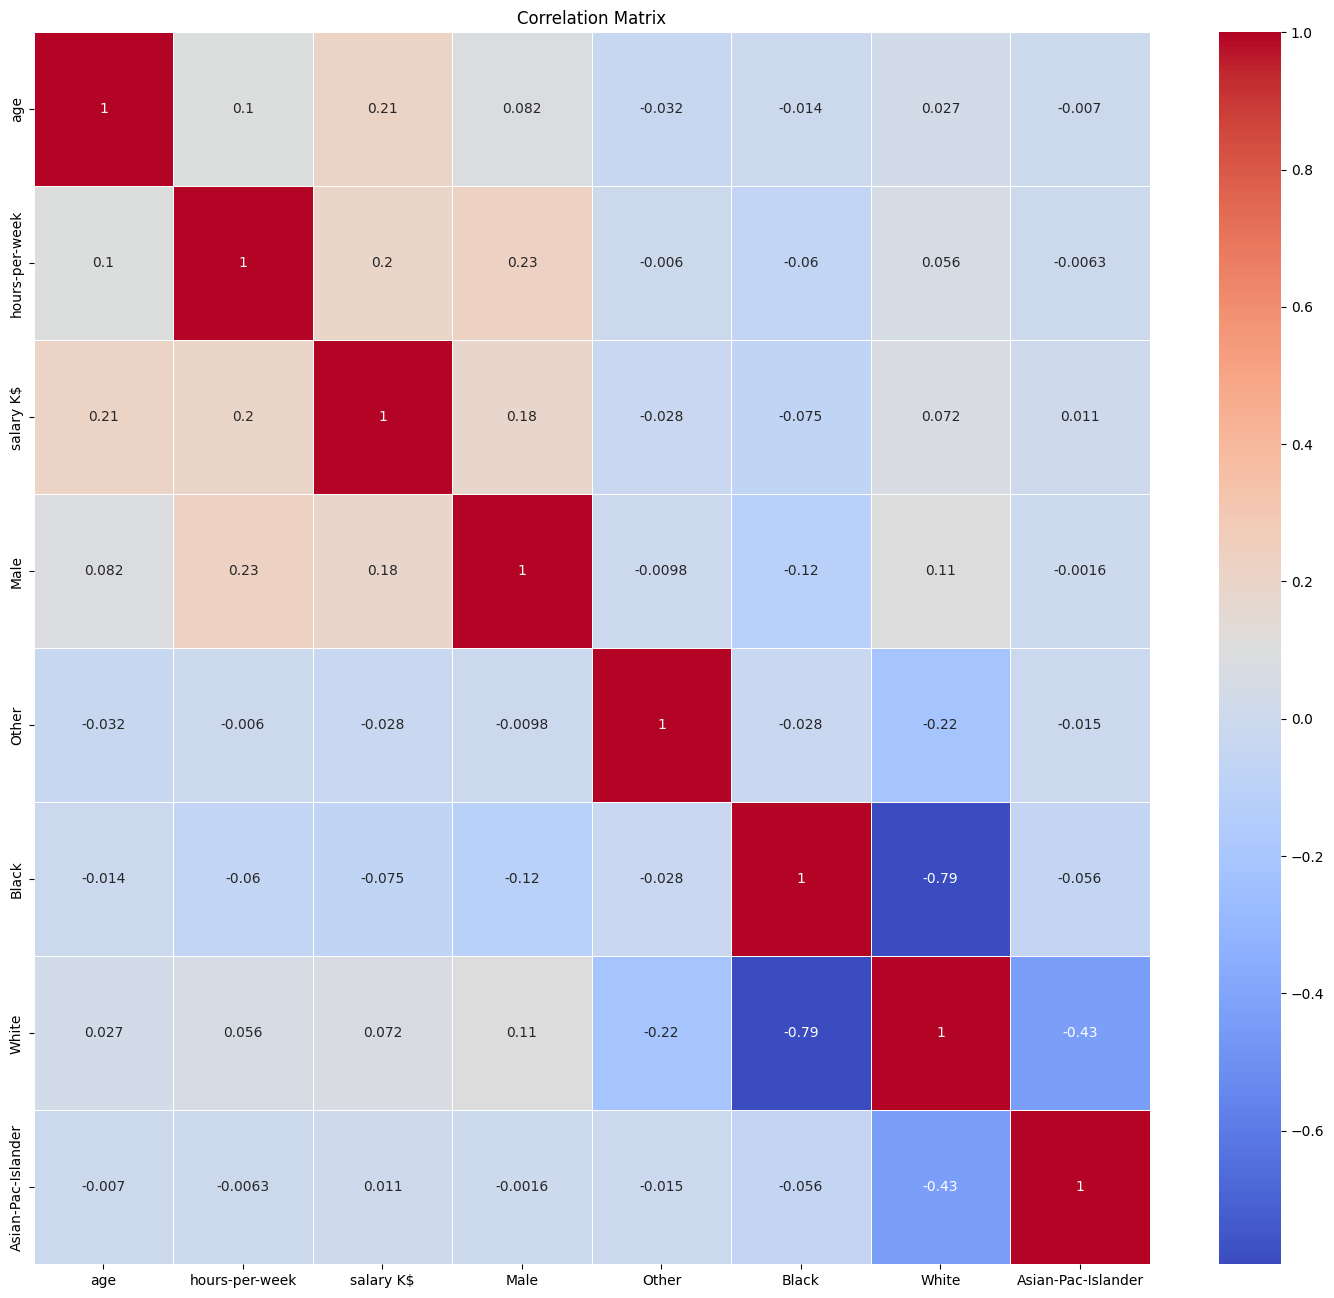

In [67]:
# write your code for task 9 here
import matplotlib.pyplot as plt
import seaborn as sns

df["Male"] = pd.get_dummies(df["sex"], drop_first=True).astype(int)
dummies = pd.get_dummies(df["race"], drop_first=True).astype(int)
# df = pd.concat([df, dummies], axis=1)

correlated = df[["age", "hours-per-week", "salary K$", "Male", "Other", "Black", "White", "Asian-Pac-Islander"]].corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlated, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")